In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set()
df= pd.read_csv("desktop/data/data_science_salaries.csv")
df.head()

,job_title,experience_level,employment_type,work_models,work_year,employee_residence,salary,salary_currency,salary_in_usd,company_location,company_size
0,Data Engineer,Mid-level,Full-time,Remote,2024,United States,148100,USD,148100,United States,Medium
1,Data Engineer,Mid-level,Full-time,Remote,2024,United States,98700,USD,98700,United States,Medium
2,Data Scientist,Senior-level,Full-time,Remote,2024,United States,140032,USD,140032,United States,Medium
3,Data Scientist,Senior-level,Full-time,Remote,2024,United States,100022,USD,100022,United States,Medium
4,BI Developer,Mid-level,Full-time,On-site,2024,United States,120000,USD,120000,United States,Medium


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6599 entries, 0 to 6598
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   job_title           6599 non-null   object
 1   experience_level    6599 non-null   object
 2   employment_type     6599 non-null   object
 3   work_models         6599 non-null   object
 4   work_year           6599 non-null   int64 
 5   employee_residence  6599 non-null   object
 6   salary              6599 non-null   int64 
 7   salary_currency     6599 non-null   object
 8   salary_in_usd       6599 non-null   int64 
 9   company_location    6599 non-null   object
 10  company_size        6599 non-null   object
dtypes: int64(3), object(8)
memory usage: 567.2+ KB


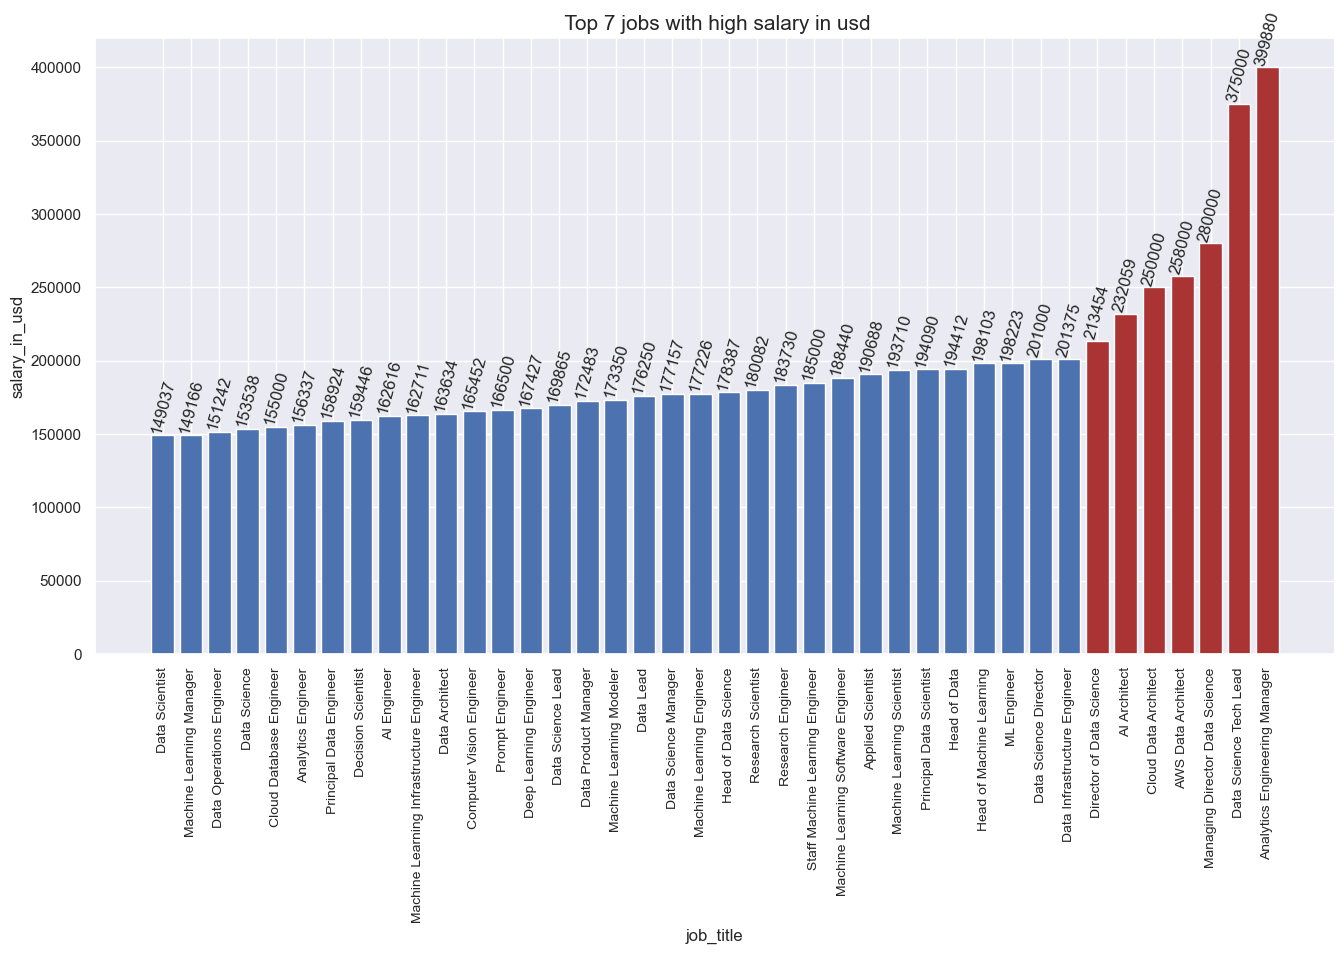

In [3]:
job_model_salary = df.groupby('job_title')['salary_in_usd'].mean().round().sort_values( ascending = False)[:40]
job_model_salary = job_model_salary.reset_index()
def barplot_Top_7_jobs(df,X,Y,xlabel,ylabel,N,title):
    df=df.sort_values(Y,ascending= True)
    df=df[df[Y]> 0]
    n = list(df[X])
    s = list(df[Y].astype(int))
    plt.figure(figsize=(16, 8))
    plt.xticks(rotation= 90, fontsize=10);
    ax = plt.bar(n,s)
    plt.title(title,fontsize=15)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    for i in range(len(s)):
        plt.annotate(str(s[i]), xy=(n[i],s[i]), ha='center', va='bottom',rotation=75)
    for i in range(len(s)-N,len(s)):
        ax.patches[i].set_facecolor('#aa3333')
    plt.show()
    
    return  n[len(n)-N-1:]
best_10= barplot_Top_7_jobs(job_model_salary,'job_title','salary_in_usd','job_title','salary_in_usd',
                                7,' Top 7 jobs with high salary in usd')

In [4]:
df.describe()

,work_year,salary,salary_in_usd
count,6599.000000,6.599000e+03,6599.000000
mean,2022.818457,1.792833e+05,145560.558569
std,0.674809,5.263722e+05,70946.838070
min,2020.000000,1.400000e+04,15000.000000
25%,2023.000000,9.600000e+04,95000.000000
50%,2023.000000,1.400000e+05,138666.000000
75%,2023.000000,1.875000e+05,185000.000000
max,2024.000000,3.040000e+07,750000.000000


In [5]:
max_salary= df[df["salary_in_usd"] == 750000]
max_salary

,job_title,experience_level,employment_type,work_models,work_year,employee_residence,salary,salary_currency,salary_in_usd,company_location,company_size
296,Machine Learning Scientist,Mid-level,Full-time,On-site,2024,United States,750000,USD,750000,United States,Medium
848,Machine Learning Scientist,Mid-level,Full-time,On-site,2023,United States,750000,USD,750000,United States,Medium
852,Machine Learning Engineer,Mid-level,Full-time,On-site,2023,United States,750000,USD,750000,United States,Medium
1540,Data Engineer,Mid-level,Full-time,On-site,2023,United States,750000,USD,750000,United States,Medium
1611,Data Scientist,Senior-level,Full-time,On-site,2023,United States,750000,USD,750000,United States,Medium


In [6]:
s = df[df["salary_in_usd"] == 22800 ]
s

,job_title,experience_level,employment_type,work_models,work_year,employee_residence,salary,salary_currency,salary_in_usd,company_location,company_size
6221,Machine Learning Scientist,Mid-level,Full-time,Remote,2022,Egypt,22800,USD,22800,Egypt,Medium


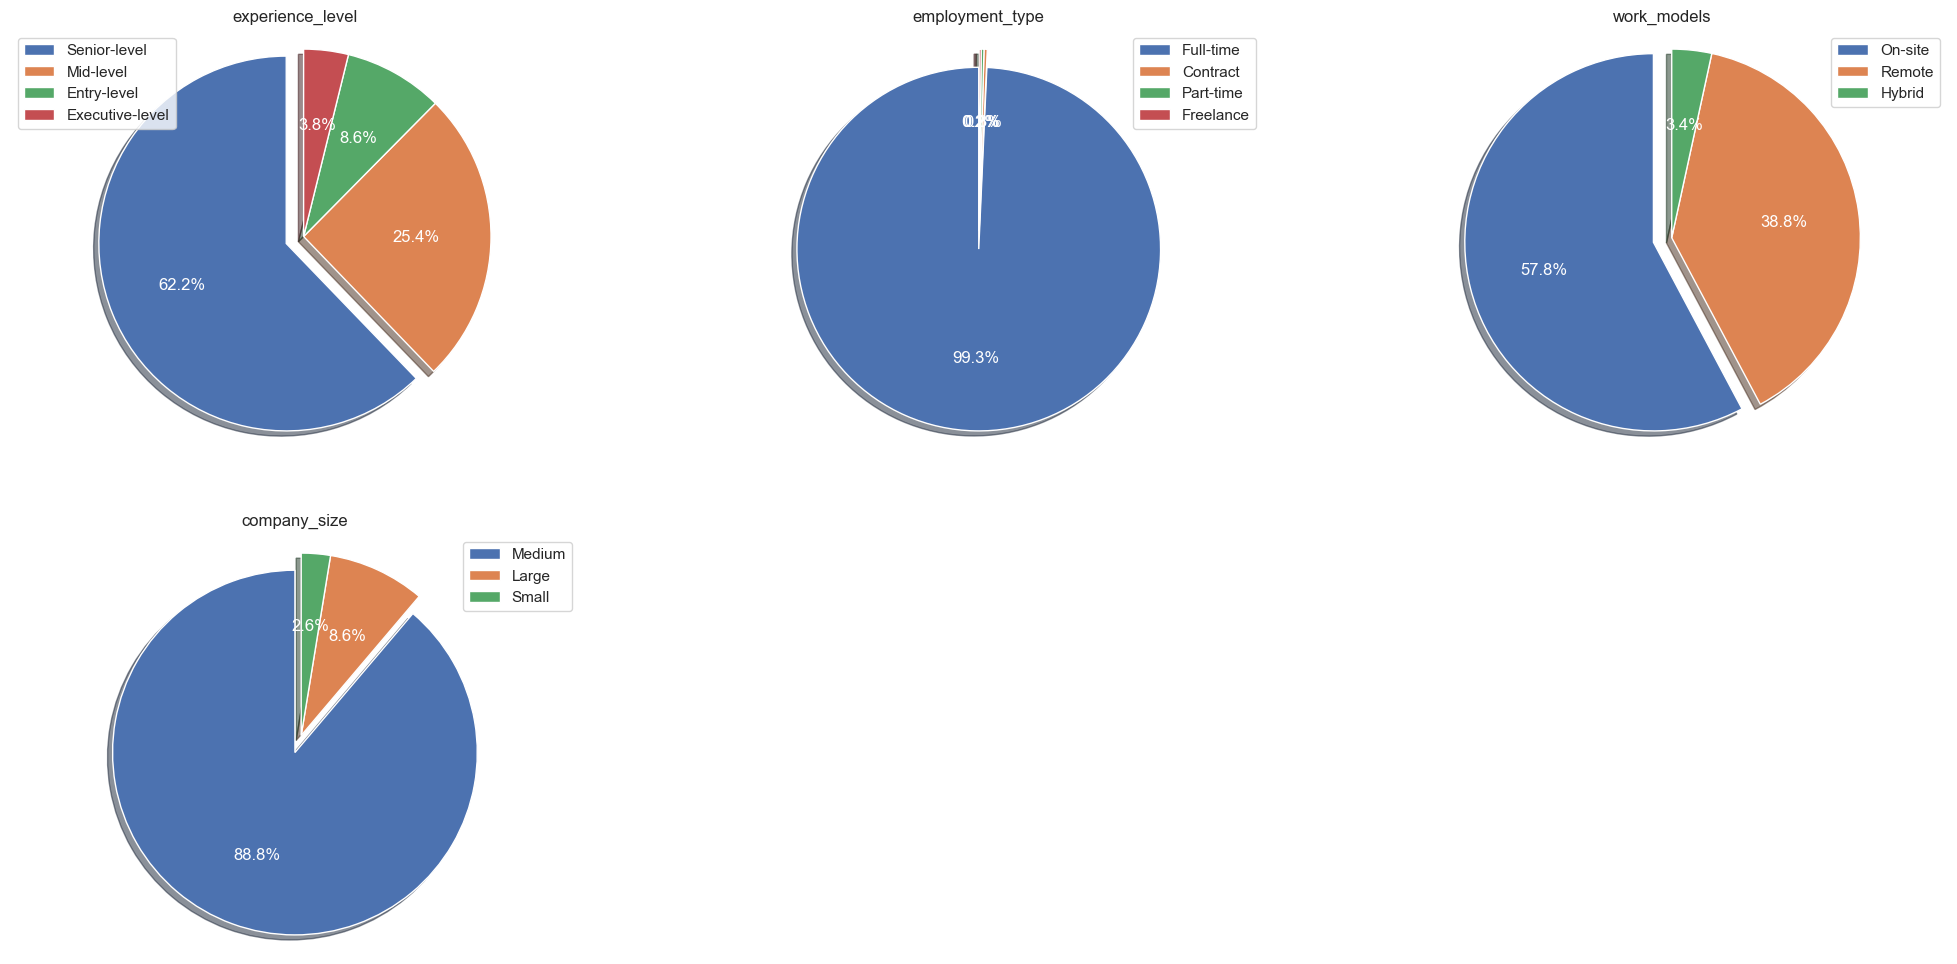

In [7]:
sns.set(style = "whitegrid")
list_variable = ["experience_level", "employment_type","work_models","company_size"]
fig1 , ax1 = plt.subplots(2,3,figsize = (25,12))
coordo = [(0,0),(0,1),(0,2),(1,0)]
explode = [[0.1,0,0,0],[0.1,0,0,0],[0.1,0,0],[0.1,0,0]]

for i,j,k in zip(list_variable, coordo , explode):
    
    ax1[j[0],j[1]].pie(df[i].value_counts(),
                       labels = df[i].value_counts().index.values,
                       explode = k,           
                       autopct='%1.1f%%',
                       shadow=True,
                       startangle=90,textprops=dict(color="w"))
    
    ax1[j[0],j[1]].axis("equal")
    ax1[j[0],j[1]].set_title(i)
    ax1[j[0],j[1]].legend(loc = "best")
fig1.delaxes(ax1[1,1])
fig1.delaxes(ax1[1,2])
plt.show()

In [8]:
v = df.employee_residence.value_counts()
new_df = df[df.employee_residence.isin(v.index[v.gt(8)])]

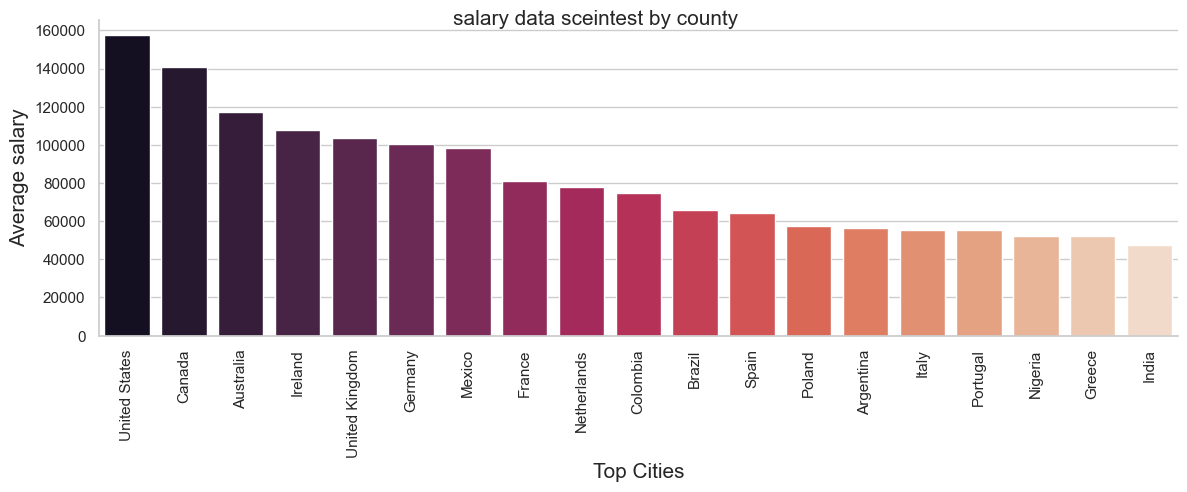

In [9]:
salary_by_country = new_df.groupby("employee_residence").salary_in_usd.mean().reset_index().sort_values(by = "salary_in_usd", ascending= False)
sns.set(style='whitegrid')
sns.catplot(x = 'employee_residence', y = 'salary_in_usd', kind = 'bar', height = 4, aspect = 3,
            palette = "rocket",
            data = salary_by_country[0:20]).fig.suptitle("salary data sceintest by county",fontsize=15);
plt.xlabel('Top Cities', fontsize=15)
plt.ylabel('Average salary', fontsize=15)
plt.xticks(rotation = 90)
plt.show()

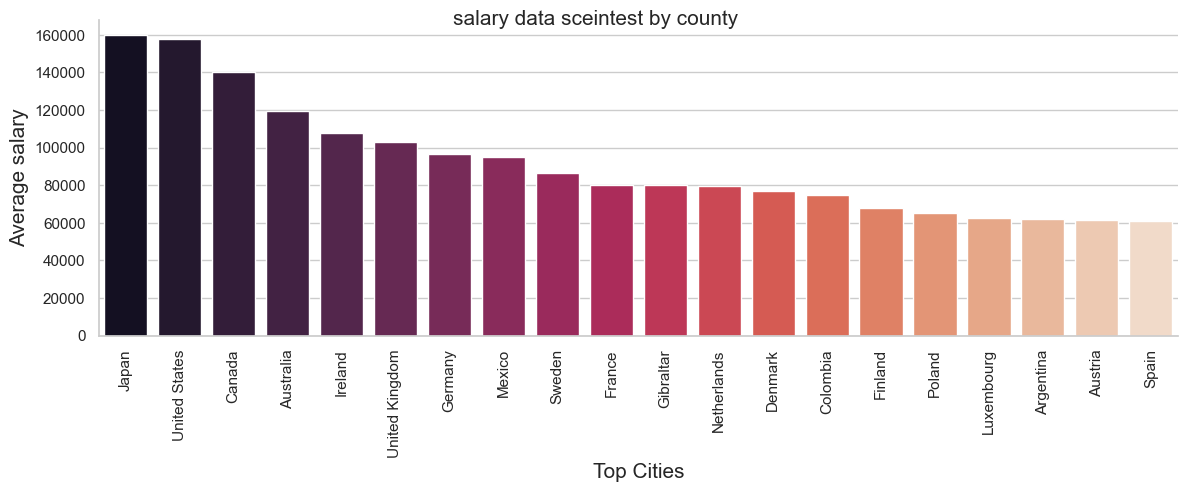

In [10]:
salary_by_country = new_df.groupby("company_location").salary_in_usd.mean().reset_index().sort_values(by = "salary_in_usd", ascending= False)
sns.set(style='whitegrid')
sns.catplot(x = 'company_location', y = 'salary_in_usd', kind = 'bar', height = 4, aspect = 3,
            palette = "rocket",
            data = salary_by_country[0:20]).fig.suptitle("salary data sceintest by county",fontsize=15);
plt.xlabel('Top Cities', fontsize=15)
plt.ylabel('Average salary', fontsize=15)
plt.xticks(rotation = 90)
plt.show()

<Axes: xlabel='work_year', ylabel='salary_in_usd'>

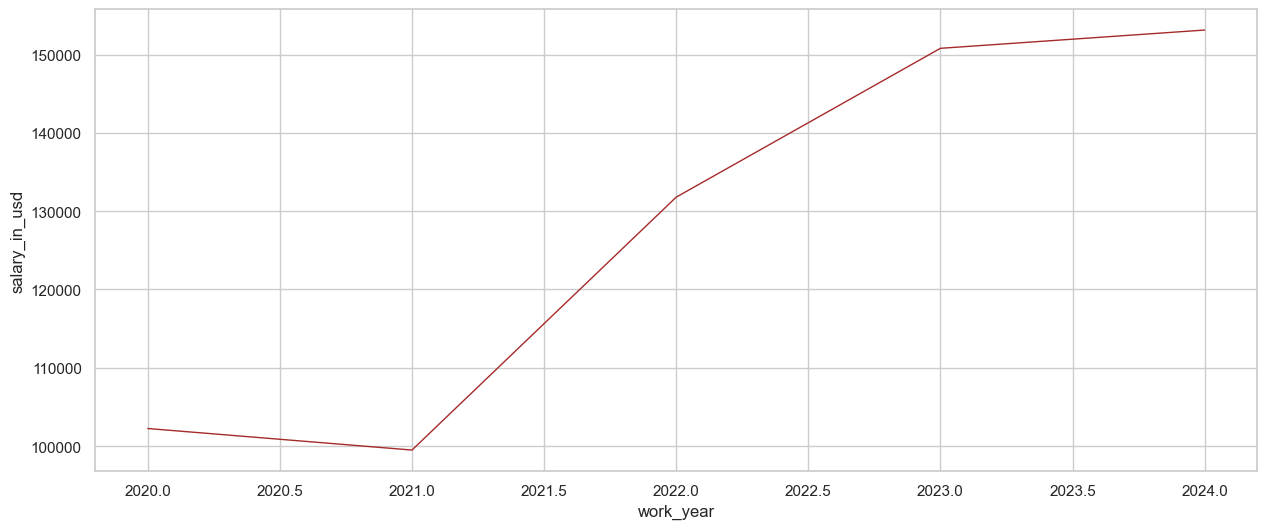

In [11]:
salary_by_year = df.groupby("work_year").salary_in_usd.mean().reset_index().sort_values(by = "salary_in_usd", ascending= False)
sns.set(style='whitegrid')
fig = plt.subplots(1, 1, figsize=(15, 6))
sns.lineplot(x='work_year', y='salary_in_usd', data=salary_by_year\
              ,errorbar=('ci', 0), color = 'brown', linewidth=1 )


In [18]:
 df.groupby(['employee_residence','work_models']).size().reset_index(name='count').sort_values(by="count",ascending = False)

,employee_residence,work_models,count
154,United States,On-site,3275
155,United States,Remote,1988
151,United Kingdom,On-site,254
152,United Kingdom,Remote,126
22,Canada,Remote,116
...,...,...,...
117,Russia,Hybrid,1
118,Russia,On-site,1
43,Finland,On-site,1
1,American Samoa,Hybrid,1


In [19]:
 df.groupby(['employee_residence','job_title']).size().reset_index(name='count').sort_values(by="count",ascending = False)


,employee_residence,job_title,count
448,United States,Data Engineer,1063
472,United States,Data Scientist,992
440,United States,Data Analyst,747
494,United States,Machine Learning Engineer,499
418,United States,Analytics Engineer,205
...,...,...,...
233,Malaysia,Head of Data,1
232,Luxembourg,Business Data Analyst,1
226,Kuwait,Data Analyst,1
225,Kenya,BI Data Analyst,1
